In [1]:
# Modules
import os
import csv

# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Save path to data set in a variable
data_file = "trimmed_df_2.csv"

# Use Pandas to read data
arlington_county = pd.read_csv(data_file, parse_dates=[0], index_col=0)
arlington_county.head()

,FullStreetAddress,Appliances,AssessmentYear,Attic,Baths,BathsFull,BathsHalf,Beds,CityName,CloseDate,...,ListingTaxID,TotalAssessment,TotalShowings,LivingArea,TotalTaxes,TotalTours,Type,YearBuilt,Zip4,PostalCode
0,3601 5TH ST S #504,"Dishwasher, Disposal, Refrigerator, Range Hood...",2014.0,No,1.0,1,0,2,ARLINGTON,2017-02-22,...,23-015-111,190500,0,1011,1897.38,1,Mid-Rise 5-8 Floors,1958,1636.0,22204
1,1600 OAK ST #1915/1914,"Cooktop, Dishwasher, Disposal, Dryer, Exhaust ...",2015.0,No,2.5,2,1,3,ARLINGTON,2017-02-21,...,17-003-291,1770000,0,3390,17629.00,1,Hi-Rise 9+ Floors,1986,2760.0,22209
2,1719 GREENBRIER ST,"ENERGY STAR Dishwasher, ENERGY STAR Refrigerat...",2015.0,Yes,7.5,7,1,7,ARLINGTON,2017-03-03,...,09-016-016,748100,0,5994,7451.08,1,Detached,2016,3629.0,22205
3,3723 FOUR MILE RUN DR,"Dishwasher, Disposal, Oven / Range - Gas, Refr...",2015.0,Yes,2.5,2,1,2,ARLINGTON,2017-01-17,...,31-030-066,342000,1,0,3406.32,1,Semi-Detached,1945,2332.0,22206
4,2005 KEY BLVD #11579,"Dishwasher, Disposal, Exhaust Fan, Microwave, ...",2016.0,No,1.0,1,0,2,ARLINGTON,2017-04-07,...,16-026-213,346300,0,852,3431.80,0,Garden 1-4 Floors,1940,NaN,22201


In [3]:
# Reorganizing the columns using double brackets
organized_arlington = arlington_county[['FullStreetAddress', 'CityName', 'AssessmentYear', 'CloseDate', 'ClosePrice', 
                                        'ContractDate', 'CountyTax', 'DaysOnMarket', 'HOA', 'ImprovementAssessmentAmount', 
                                        'LandAssessmentAmount', 'Stories', 'ListDate', 'ListPrice', 'ListingLowPrice', 
                                        'ListingType', 'ListingID', 'OriginalListPrice', 'Ownership', 'ShowDays', 
                                        'StreetName', 'StreetNumber', 'Style', 'TotalAssessment', 'TotalTaxes', 
                                        'Type', 'YearBuilt', 'PostalCode']]

organized_arlington.head()

,FullStreetAddress,CityName,AssessmentYear,CloseDate,ClosePrice,ContractDate,CountyTax,DaysOnMarket,HOA,ImprovementAssessmentAmount,...,Ownership,ShowDays,StreetName,StreetNumber,Style,TotalAssessment,TotalTaxes,Type,YearBuilt,PostalCode
0,3601 5TH ST S #504,ARLINGTON,2014.0,2017-02-22,185000.0,2017-01-15,1872.62,688,False,154100.0,...,Condo,NaN,5TH,3601.0,Contemporary,190500,1897.38,Mid-Rise 5-8 Floors,1958,22204
1,1600 OAK ST #1915/1914,ARLINGTON,2015.0,2017-02-21,1700000.0,2016-11-16,NaN,514,True,1648000.0,...,Condo,All Days,OAK,1600.0,Contemporary,1770000,17629.00,Hi-Rise 9+ Floors,1986,22209
2,1719 GREENBRIER ST,ARLINGTON,2015.0,2017-03-03,1625000.0,2017-01-08,7353.82,489,False,173100.0,...,Fee Simple,NaN,GREENBRIER,1719.0,Arts & Crafts,748100,7451.08,Detached,2016,22205
3,3723 FOUR MILE RUN DR,ARLINGTON,2015.0,2017-01-17,430000.0,2016-12-03,3361.86,121,False,152000.0,...,Fee Simple,All Days,FOUR MILE RUN,3723.0,Federal,342000,3406.32,Semi-Detached,1945,22206
4,2005 KEY BLVD #11579,ARLINGTON,2016.0,2017-04-07,362000.0,2017-03-06,3386.81,81,True,309700.0,...,Condo,NaN,KEY,2005.0,Rambler,346300,3431.80,Garden 1-4 Floors,1940,22201


In [4]:
# Drop all rows with missing information
organized_arlington = organized_arlington.dropna(how='any')

organized_arlington["AssessmentYear"] = organized_arlington["AssessmentYear"].astype('int64')
organized_arlington["StreetNumber"] = organized_arlington["StreetNumber"].astype('int64')
organized_arlington["TotalAssessment"] = organized_arlington["TotalAssessment"].astype('float')

organized_arlington.head()

,FullStreetAddress,CityName,AssessmentYear,CloseDate,ClosePrice,ContractDate,CountyTax,DaysOnMarket,HOA,ImprovementAssessmentAmount,...,Ownership,ShowDays,StreetName,StreetNumber,Style,TotalAssessment,TotalTaxes,Type,YearBuilt,PostalCode
3,3723 FOUR MILE RUN DR,ARLINGTON,2015,2017-01-17,430000.0,2016-12-03,3361.86,121,False,152000.0,...,Fee Simple,All Days,FOUR MILE RUN,3723,Federal,342000.0,3406.32,Semi-Detached,1945,22206
5,1719 GLEBE RD N,ARLINGTON,2016,2017-04-28,760000.0,2017-03-25,7480.72,12,False,288700.0,...,Fee Simple,All Days,GLEBE,1719,Colonial,764900.0,7580.14,Detached,1937,22207
6,1400 KENMORE ST,ARLINGTON,2016,2017-04-07,930000.0,2017-03-15,7869.97,7,False,192700.0,...,Fee Simple,All Days,KENMORE,1400,Traditional,804700.0,7974.56,Detached,1942,22201
7,1800 WILSON BLVD #222,ARLINGTON,2016,2017-05-10,392000.0,2017-04-03,3576.55,10,False,326200.0,...,Condo,All Days,WILSON,1800,Contemporary,365700.0,3624.08,Garden 1-4 Floors,2007,22201
8,4195 FOUR MILE RUN DR S #201,ARLINGTON,2016,2017-06-29,313000.0,2017-05-26,3009.31,17,False,273700.0,...,Condo,All Days,FOUR MILE RUN,4195,Contemporary,307700.0,3049.30,Garden 1-4 Floors,1966,22204


In [5]:
# Filter the DataFrame down only to those columns to chart
style_tax = organized_arlington[["Type","ListPrice","ClosePrice","DaysOnMarket"]]

style_tax.head()

,Type,ListPrice,ClosePrice,DaysOnMarket
3,Semi-Detached,475000.0,430000.0,121
5,Detached,765000.0,760000.0,12
6,Detached,899000.0,930000.0,7
7,Garden 1-4 Floors,399900.0,392000.0,10
8,Garden 1-4 Floors,313000.0,313000.0,17


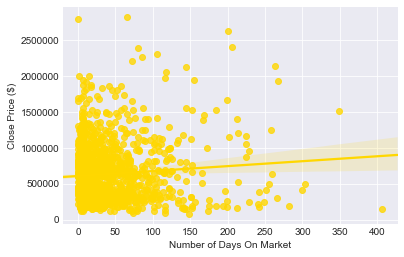

In [6]:
# use the function regplot to make a scatterplot

sns.regplot(x=style_tax["DaysOnMarket"], y=style_tax["ClosePrice"], marker="o", color="gold")

# Add titles (main and on axis)
plt.xlabel("Number of Days On Market")
plt.ylabel("Close Price ($)")
# plt.savefig("DaysOnMarketClosePrice.png")

plt.show()

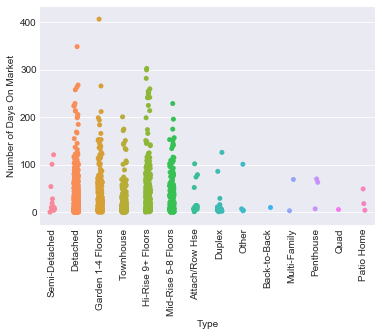

In [7]:
tips = sns.load_dataset("tips")

ax = sns.stripplot(x=style_tax["Type"], y=style_tax["DaysOnMarket"], data=tips, jitter=True)

# Add titles (main and on axis)
plt.ylabel("Number of Days On Market")

plt.xticks(rotation=90)

# plt.savefig("TypeDaysOnMarket.png")

plt.show()

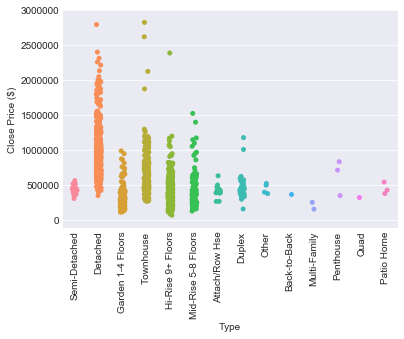

In [8]:
ax = sns.stripplot(x=style_tax["Type"], y=style_tax["ClosePrice"], data=tips, jitter=True)

# Add titles (main and on axis)
# plt.xlabel("Number of Days On Market")
plt.ylabel("Close Price ($)")

# plt.savefig("TypeClosePrice.png")

plt.xticks(rotation=90)

plt.show()